In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [3]:
input_dim = x_train.shape[1] # 784 (28*28)
encoding_dim = 32 # You can adjust this value
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

In [4]:
autoencoder.fit(x_train, x_train,
epochs=50,
batch_size=256,
shuffle=True,
validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3878 - val_loss: 0.1894
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1792 - val_loss: 0.1525
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1481 - val_loss: 0.1324
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1304 - val_loss: 0.1209
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1200 - val_loss: 0.1130
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1126 - val_loss: 0.1073
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1074 - val_loss: 0.1030
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1036 - val_loss: 0.0998
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1005 - val_loss: 0.0973
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0984 - val_loss: 0.0957
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0968 - val_loss: 0.0944
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

In [5]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


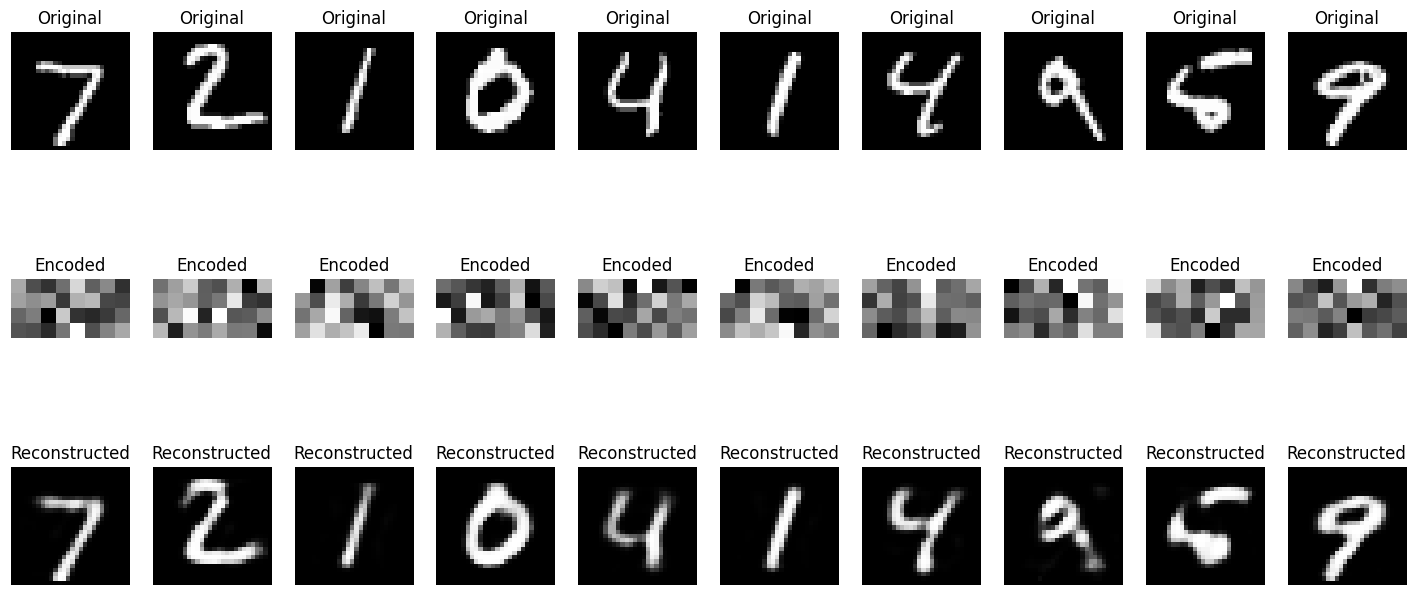

In [7]:
n = 10 # Number of images to display
plt.figure(figsize=(18, 8))
for i in range(n):
# Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title("Original")
    plt.gray()
    ax.axis('off')
# Encoded images (dimensionality reduced representation)
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(4, 8)) # Reshape for visualization
    plt.title("Encoded")
    plt.gray()
    ax.axis('off')
# Reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.title("Reconstructed")
    plt.gray()
    ax.axis('off')
plt.show()

In [1]:
pip install extra-keras-datasets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: C:\Users\harip\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist

In [6]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 101s 4us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 15s 3us/step


In [8]:
input_dim = x_train.shape[1] # 784 (28*28)
encoding_dim = 32 # You can adjust this value
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

In [9]:
autoencoder.fit(x_train, x_train,
epochs=50,
batch_size=256,
shuffle=True,
validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.4986 - val_loss: 0.3436
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.3335 - val_loss: 0.3199
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.3150 - val_loss: 0.3087
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.3043 - val_loss: 0.3010
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.2972 - val_loss: 0.2953
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2918 - val_loss: 0.2918
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2889 - val_loss: 0.2899
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.2873 - val_loss: 0.2888
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - loss: 0.2859 - val_loss: 0.2879
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.2859 - val_loss: 0.2874
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2846 - val_loss: 0.2869
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━

In [10]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


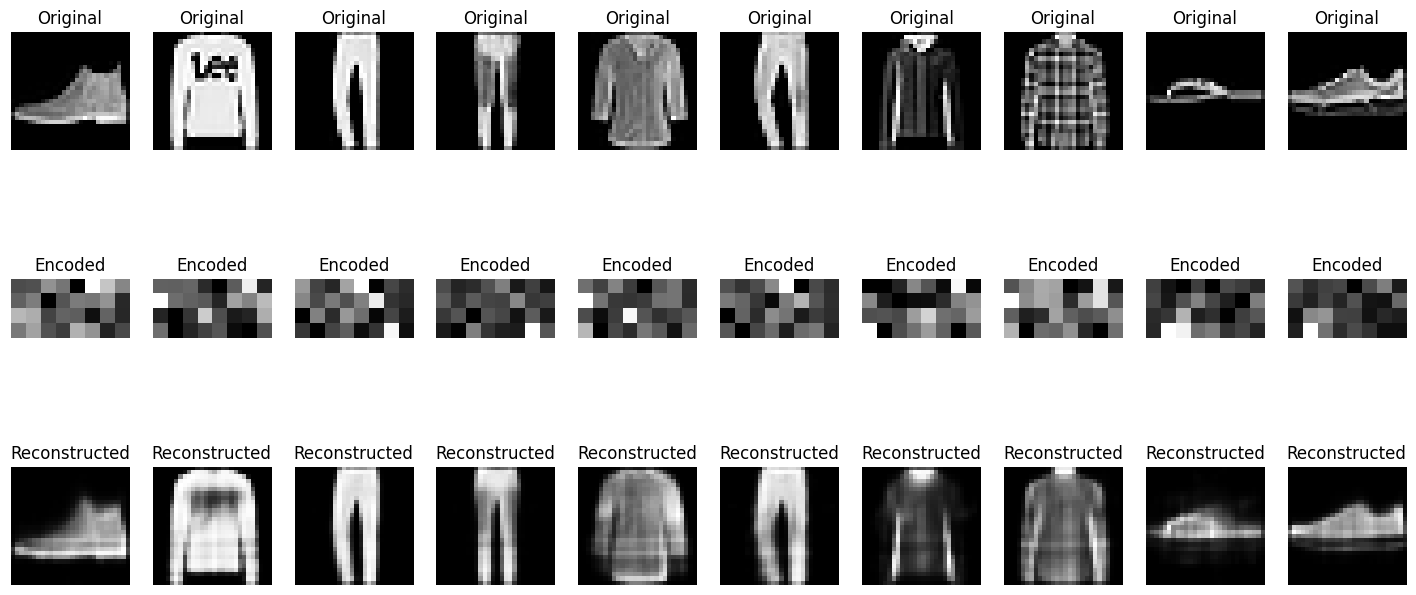

In [11]:
n = 10 # Number of images to display
plt.figure(figsize=(18, 8))
for i in range(n):
# Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title("Original")
    plt.gray()
    ax.axis('off')
# Encoded images (dimensionality reduced representation)
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(4, 8)) # Reshape for visualization
    plt.title("Encoded")
    plt.gray()
    ax.axis('off')
# Reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.title("Reconstructed")
    plt.gray()
    ax.axis('off')
plt.show()